In [12]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'21',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7421eabb-f4d6-4e53-a9d3-5bdf63541578',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:

# I had to use the prompt "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in anaconda prompt"

{'status': {'timestamp': '2024-04-11T19:24:54.771Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9607}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10981, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [13]:
import pandas as pd

# Allows us to see all columns of data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10981,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967988e+07,1.967988e+07,False,NaN,1,NaN,NaN,None,2024-04-11T19:24:00.000Z,70273.900849,3.335774e+10,-4.6935,0.136347,1.267208,2.234069,-1.778414,45.466285,61.479673,1.382982e+12,53.0443,1.475752e+12,None,2024-04-11T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
1,1027,Ethereum,ETH,ethereum,8763,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200705e+08,1.200705e+08,True,NaN,2,NaN,NaN,None,2024-04-11T19:23:00.000Z,3509.956812,1.485242e+10,-7.9314,0.101320,0.307116,4.020804,-11.599253,39.930432,34.947101,4.214424e+11,16.1540,4.214424e+11,None,2024-04-11T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
2,825,Tether USDt,USDT,tether,82292,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.072675e+11,1.109410e+11,True,NaN,3,NaN,NaN,None,2024-04-11T19:22:00.000Z,1.000039,6.126571e+10,-6.0087,-0.016271,-0.000191,-0.048967,-0.038304,-0.021746,0.115629,1.072717e+11,4.1149,1.109453e+11,None,2024-04-11T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-11 20:24:59.382772
3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495345e+08,1.495345e+08,False,NaN,4,NaN,NaN,None,2024-04-11T19:23:00.000Z,604.346463,1.378796e+09,-11.6709,0.156412,-0.510063,1.571035,11.438859,87.835484,100.837177,9.037065e+10,3.4657,9.037065e+10,None,2024-04-11T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.458485e+08,5.736495e+08,True,NaN,5,NaN,NaN,None,2024-04-11T19:22:00.000Z,175.022456,2.899580e+09,-6.9004,0.512266,3.442337,-6.076051,17.485114,61.629607,84.198265,7.803351e+10,2.9930,1.004015e+11,None,2024-04-11T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
5,52,XRP,XRP,xrp,1295,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,6,NaN,NaN,None,2024-04-11T19:24:00.000Z,0.610550,1.239077e+09,-43.8768,0.110114,-0.892445,1.994257,-11.296764,15.312378,5.796729,3.361170e+10,1.2890,6.105496e+10,None,2024-04-11T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
6,3408,USDC,USDC,usd-coin,18104,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.209644e+10,3.209644e+10,False,NaN,7,NaN,NaN,None,2024-04-11T19:22:00.000Z,1.000077,7.464815e+09,4.7568,-0.012339,0.002643,0.008149,0.008292,0.006231,0.001916,3.209890e+10,1.2309,3.209890e+10,None,2024-04-11T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-11 20:24:59.382772
7,74,Dogecoin,DOGE,dogecoin,949,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.438453e+11,1.438453e+11,True,NaN,8,NaN,NaN,None,2024-04-11T19:24:00.000Z,0.192664,2.476989e+09,9.6744,0.304963,-1.014019,4.921112,15.456335,134.720269,136.873547,2.771380e+10,1.0630,2.771380e+10,None,2024-04-11T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
8,11419,Toncoin,TON,toncoin,271,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.470717e+09,5.

In [15]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'21',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7421eabb-f4d6-4e53-a9d3-5bdf63541578',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:

# I had to use the prompt "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in anaconda prompt

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append])

    if not os.path.isfile(r'C:\Users\Jamal\OneDrive\Desktop\Data Analyst Role\Automated Crypto\API.csv'):
        df.to_csv(r'C:\Users\Jamal\OneDrive\Desktop\Data Analyst Role\Automated Crypto\API.csv', header ='column_names')
    else:
        df.to_csv(r'C:\Users\Jamal\OneDrive\Desktop\Data Analyst Role\Automated Crypto\API.csv', mode='a', header=False)

In [16]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [17]:
df = pd.read_csv(r'C:\Users\Jamal\OneDrive\Desktop\Data Analyst Role\Automated Crypto\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10981,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.967988e+07,1.967988e+07,False,NaN,1,NaN,NaN,NaN,2024-04-11T19:24:00.000Z,70273.900849,3.335774e+10,-4.6935,0.136347,1.267208,2.234069,-1.778414,45.466285,61.479673,1.382982e+12,53.0443,1.475752e+12,NaN,2024-04-11T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
1,1,1027,Ethereum,ETH,ethereum,8763,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.200705e+08,1.200705e+08,True,NaN,2,NaN,NaN,NaN,2024-04-11T19:23:00.000Z,3509.956812,1.485242e+10,-7.9314,0.101320,0.307116,4.020804,-11.599253,39.930432,34.947101,4.214424e+11,16.1540,4.214424e+11,NaN,2024-04-11T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
2,2,825,Tether USDt,USDT,tether,82292,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.072675e+11,1.109410e+11,True,NaN,3,NaN,NaN,NaN,2024-04-11T19:22:00.000Z,1.000039,6.126571e+10,-6.0087,-0.016271,-0.000191,-0.048967,-0.038304,-0.021746,0.115629,1.072717e+11,4.1149,1.109453e+11,NaN,2024-04-11T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-11 20:24:59.382772
3,3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495345e+08,1.495345e+08,False,NaN,4,NaN,NaN,NaN,2024-04-11T19:23:00.000Z,604.346463,1.378796e+09,-11.6709,0.156412,-0.510063,1.571035,11.438859,87.835484,100.837177,9.037065e+10,3.4657,9.037065e+10,NaN,2024-04-11T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
4,4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.458485e+08,5.736495e+08,True,NaN,5,NaN,NaN,NaN,2024-04-11T19:22:00.000Z,175.022456,2.899580e+09,-6.9004,0.512266,3.442337,-6.076051,17.485114,61.629607,84.198265,7.803351e+10,2.9930,1.004015e+11,NaN,2024-04-11T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
5,5,52,XRP,XRP,xrp,1295,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,6,NaN,NaN,NaN,2024-04-11T19:24:00.000Z,0.610550,1.239077e+09,-43.8768,0.110114,-0.892445,1.994257,-11.296764,15.312378,5.796729,3.361170e+10,1.2890,6.105496e+10,NaN,2024-04-11T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
6,6,3408,USDC,USDC,usd-coin,18104,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.209644e+10,3.209644e+10,False,NaN,7,NaN,NaN,NaN,2024-04-11T19:22:00.000Z,1.000077,7.464815e+09,4.7568,-0.012339,0.002643,0.008149,0.008292,0.006231,0.001916,3.209890e+10,1.2309,3.209890e+10,NaN,2024-04-11T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-11 20:24:59.382772
7,7,74,Dogecoin,DOGE,dogecoin,949,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.438453e+11,1.438453e+11,True,NaN,8,NaN,NaN,NaN,2024-04-11T19:24:00.000Z,0.192664,2.476989e+09,9.6744,0.304963,-1.014019,4.921112,15.456335,134.720269,136.873547,2.771380e+10,1.0630,2.771380e+10,NaN,2024-04-11T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
8,8,11419,Toncoin,TON,toncoin,271,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10981,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19679875.00000,19679875.00000,False,NaN,1,NaN,NaN,NaN,2024-04-11T19:24:00.000Z,70273.90085,33357736432.93304,-4.69350,0.13635,1.26721,2.23407,-1.77841,45.46628,61.47967,1382981584461.01611,53.04430,1475751917818.64990,NaN,2024-04-11T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
1,1,1027,Ethereum,ETH,ethereum,8763,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120070549.32769,120070549.32769,True,NaN,2,NaN,NaN,NaN,2024-04-11T19:23:00.000Z,3509.95681,14852418456.01345,-7.93140,0.10132,0.30712,4.02080,-11.59925,39.93043,34.94710,421442442555.81189,16.15400,421442442555.81000,NaN,2024-04-11T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
2,2,825,Tether USDt,USDT,tether,82292,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,107267504623.65916,110941048614.45586,True,NaN,3,NaN,NaN,NaN,2024-04-11T19:22:00.000Z,1.00004,61265708559.47041,-6.00870,-0.01627,-0.00019,-0.04897,-0.03830,-0.02175,0.11563,107271656492.81680,4.11490,110945342670.89000,NaN,2024-04-11T19:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-11 20:24:59.382772
3,3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149534499.50323,149534499.50323,False,NaN,4,NaN,NaN,NaN,2024-04-11T19:23:00.000Z,604.34646,1378795904.98756,-11.67090,0.15641,-0.51006,1.57104,11.43886,87.83548,100.83718,90370645915.76910,3.46570,90370645915.77000,NaN,2024-04-11T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
4,4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,445848543.82214,573649527.78458,True,NaN,5,NaN,NaN,NaN,2024-04-11T19:22:00.000Z,175.02246,2899580352.48617,-6.90040,0.51227,3.44234,-6.07605,17.48511,61.62961,84.19827,78033507149.58842,2.99300,100401549243.58000,NaN,2024-04-11T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
5,5,52,XRP,XRP,xrp,1295,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,6,NaN,NaN,NaN,2024-04-11T19:24:00.000Z,0.61055,1239077351.38502,-43.87680,0.11011,-0.89244,1.99426,-11.29676,15.31238,5.79673,33611701947.19940,1.28900,61054960796.16000,NaN,2024-04-11T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 20:24:59.382772
6,6,3408,USDC,USDC,usd-coin,18104,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32096440947.24389,32096440947.24389,False,NaN,7,NaN,NaN,NaN,2024-04-11T19:22:00.000Z,1.00008,7464815237.22590,4.75680,-0.01234,0.00264,0.00815,0.00829,0.00623,0.00192,32098899439.99164,1.23090,32098899439.99000,NaN,2024-04-11T19:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-11 20:24:59.382772
7,7,74,Dogecoin,DOGE,dogecoin,949,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,143845256383.70526,143845256383.70526,True,NaN,8,NaN,NaN,NaN,2024-04-11T19:24:00.000Z,0.19266,2476988551.04273,9.67440,0.30496,-1.01402,4.92111,15.45633,134.72027,136.87355,27713803993.45138,1.06300,27713803993.45000,NaN,2024-04-11T19:24:00.000

In [19]:
#Observing the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()                                                                                                                                                                                                                                  
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.15434,1.21855,2.22341,-1.77542,45.45654,61.43496
Ethereum,0.10056,0.27280,3.99899,-11.70582,39.92723,34.87606
Tether USDt,-0.01057,-0.00499,-0.04788,-0.04484,-0.02573,0.11388
BNB,0.15296,-0.48415,1.61709,11.46303,87.87481,100.79071
Solana,0.52524,3.51700,-6.06638,17.54756,61.71816,84.30792
XRP,0.15776,-0.90183,2.00929,-11.27422,15.34437,5.76332
USDC,-0.00713,0.00413,0.01017,0.00148,0.00714,0.00104
Dogecoin,0.35485,-1.15169,5.01755,15.43149,134.89191,136.88065
Toncoin,-0.55614,8.08214,41.42268,92.82035,241.64128,235.96113


In [20]:
df4 = df3.stack()
df4

name                                           
Bitcoin            quote.USD.percent_change_1h      0.15434
                   quote.USD.percent_change_24h     1.21855
                   quote.USD.percent_change_7d      2.22341
                   quote.USD.percent_change_30d    -1.77542
                   quote.USD.percent_change_60d    45.45654
                   quote.USD.percent_change_90d    61.43496
Ethereum           quote.USD.percent_change_1h      0.10056
                   quote.USD.percent_change_24h     0.27280
                   quote.USD.percent_change_7d      3.99899
                   quote.USD.percent_change_30d   -11.70582
                   quote.USD.percent_change_60d    39.92723
                   quote.USD.percent_change_90d    34.87606
Tether USDt        quote.USD.percent_change_1h     -0.01057
                   quote.USD.percent_change_24h    -0.00499
                   quote.USD.percent_change_7d     -0.04788
                   quote.USD.percent_change_30d    -

In [22]:
type(df4)

pandas.core.series.Series

In [23]:
df5 = df4.to_frame(name='values')
df5

values
name                                                    
Bitcoin           quote.USD.percent_change_1h    0.15434
                  quote.USD.percent_change_24h   1.21855
                  quote.USD.percent_change_7d    2.22341
                  quote.USD.percent_change_30d  -1.77542
                  quote.USD.percent_change_60d  45.45654
                  quote.USD.percent_change_90d  61.43496
Ethereum          quote.USD.percent_change_1h    0.10056
                  quote.USD.percent_change_24h   0.27280
                  quote.USD.percent_change_7d    3.99899
                  quote.USD.percent_change_30d -11.70582
                  quote.USD.percent_change_60d  39.92723
                  quote.USD.percent_change_90d  34.87606
Tether USDt       quote.USD.percent_change_1h   -0.01057
                  quote.USD.percent_change_24h  -0.00499
                  quote.USD.percent_change_7d   -0.04788
                  quote.USD.percent_change_30d  -0.04484
                  quote.USD.percent_change_60d  -0.02573
                  quote.USD.percent_change_90d   0.11388
BNB               quote.USD.percent_change_1h    0.15296
                  quote.USD.percent_change_24h  -0.48415
                  quote.USD.percent_change_7d    1.61709
                  quote.USD.percent_change_30d  11.46303
                  quote.USD.percent_change_60d  87.87481
                  quote.USD.percent_change_90d 100.79071
Solana            quote.USD.percent_change_1h    0.52524
                  quote.USD.percent_change_24h   3.51700
                  quote.USD.percent_change_7d   -6.06638
                  quote.USD.percent_change_30d  17.54756
                  quote.USD.percent_change_60d  61.71816
                  quote.USD.percent_change_90d  84.30792
XRP               quote.USD.percent_change_1h    0.15776
                  quote.USD.percent_change_24h  -0.90183
                  quote.USD.percent_change_7d    2.00929
                  quote.USD.percent_change_30d -11.27422
                  quote.USD.percent_change_60d  15.34437
                  quote.USD.percent_change_90d   5.76332
USDC              quote.USD.percent_change_1h   -0.00713
                  quote.USD.percent_change_24h   0.00413
                  quote.USD.percent_change_7d    0.01017
                  quote.USD.percent_change_30d   0.00148
                  quote.USD.percent_change_60d   0.00714
                  quote.USD.percent_change_90d   0.00104
Dogecoin          quote.USD.percent_change_1h    0.35485
                  quote.USD.percent_change_24h  -1.15169
                  quote.USD.percent_change_7d    5.01755
                  quote.USD.percent_change_30d  15.43149
                  quote.USD.percent_change_60d 134.89191
                  quote.USD.percent_change_90d 136.88065
Toncoin           quote.USD.percent_change_1h   -0.55614
                  quote.USD.percent_change_24h   8.08214
                  quote.USD.percent_change_7d   41.42268
                  quote.USD.percent_change_30d  92.82035
                  quote.USD.percent_change_60d 241.64128
                  quote.USD.percent_change_90d 235.96113
Cardano           quote.USD.percent_change_1h   -0.03873
                  quote.USD.percent_change_24h   0.76505
                  quote.USD.percent_change_7d   -0.92008
                  quote.USD.percent_change_30d -21.54697
                  quote.USD.percent_change_60d   7.38019
                  quote.USD.percent_change_90d   4.31927
Avalanche         quote.USD.percent_change_1h    0.08577
                  quote.USD.percent_change_24h  -1.36578
                  quote.USD.percent_change_7d   -2.48059
                  quote.USD.percent_change_30d -18.36266
                  quote.USD.percent_change_60d  15.56679
                  quote.USD.percent_change_90d  26.44743
Shiba Inu         quote.USD.percent_change_1h    0.20719
                  quote.USD.percent_change_24h  -0.81284
                  quote.USD.percent_change_7d   -2.17294
   

In [25]:
df5.count()

values    126
dtype: int64

In [26]:
# Due to the structure of the data we need to set an index - so I'm going to create a range and pass that as the dataframe

Index = pd.Index(range(126))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.15434
1,Bitcoin,quote.USD.percent_change_24h,1.21855
2,Bitcoin,quote.USD.percent_change_7d,2.22341
3,Bitcoin,quote.USD.percent_change_30d,-1.77542
4,Bitcoin,quote.USD.percent_change_60d,45.45654
5,Bitcoin,quote.USD.percent_change_90d,61.43496
6,Ethereum,quote.USD.percent_change_1h,0.10056
7,Ethereum,quote.USD.percent_change_24h,0.27280
8,Ethereum,quote.USD.percent_change_7d,3.99899
9,Ethereum,quote.USD.percent_change_30d,-11.70582


In [27]:
# Changing the Column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.15434
1,Bitcoin,quote.USD.percent_change_24h,1.21855
2,Bitcoin,quote.USD.percent_change_7d,2.22341
3,Bitcoin,quote.USD.percent_change_30d,-1.77542
4,Bitcoin,quote.USD.percent_change_60d,45.45654
5,Bitcoin,quote.USD.percent_change_90d,61.43496
6,Ethereum,quote.USD.percent_change_1h,0.10056
7,Ethereum,quote.USD.percent_change_24h,0.27280
8,Ethereum,quote.USD.percent_change_7d,3.99899
9,Ethereum,quote.USD.percent_change_30d,-11.70582


In [28]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.15434
1,Bitcoin,24h,1.21855
2,Bitcoin,7d,2.22341
3,Bitcoin,30d,-1.77542
4,Bitcoin,60d,45.45654
5,Bitcoin,90d,61.43496
6,Ethereum,1h,0.10056
7,Ethereum,24h,0.27280
8,Ethereum,7d,3.99899
9,Ethereum,30d,-11.70582


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

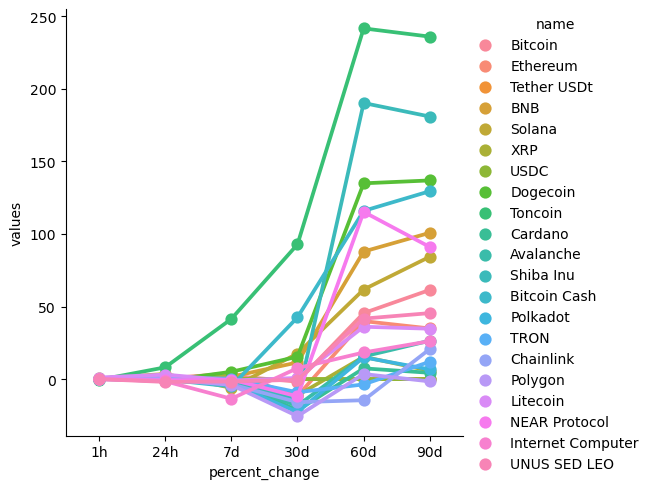

In [30]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [47]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,70273.90085,2024-04-11 20:24:59.382772
21,Bitcoin,70273.90085,2024-04-11 20:25:06.422258
42,Bitcoin,70273.90085,2024-04-11 20:24:59.382772
63,Bitcoin,70273.90085,2024-04-11 20:25:06.422258
84,Bitcoin,70257.30418,2024-04-11 20:26:07.060402
105,Bitcoin,70273.90085,2024-04-11 20:24:59.382772
126,Bitcoin,70273.90085,2024-04-11 20:25:06.422258
147,Bitcoin,70257.30418,2024-04-11 20:26:07.060402
168,Bitcoin,70307.02622,2024-04-11 20:27:07.647445
189,Bitcoin,70273.90085,2024-04-11 20:24:59.382772


C:\Users\Jamal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jamal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2024-04-11 20:24:59.382772'),
  Text(1, 0, '2024-04-11 20:25:06.422258'),
  Text(2, 0, '2024-04-11 20:26:07.060402'),
  Text(3, 0, '2024-04-11 20:27:07.647445'),
  Text(4, 0, '2024-04-11 20:28:08.248733'),
  Text(5, 0, '2024-04-11 20:29:08.861047')])

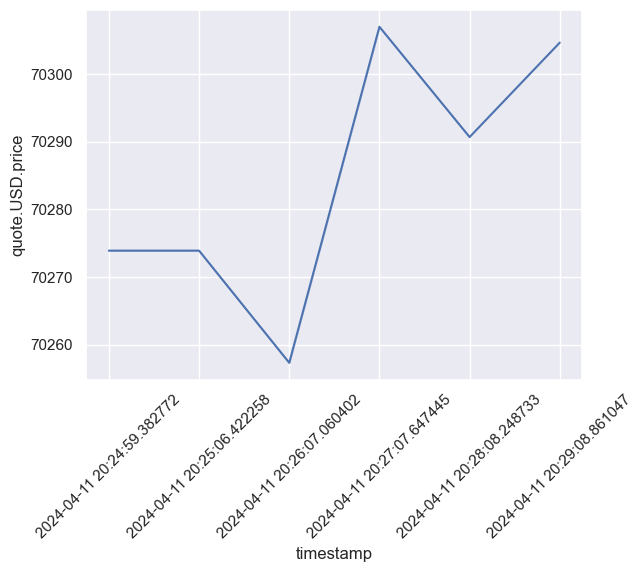

In [48]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data =df10)
plt.xticks(rotation=45)